In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'mathtext.default':  'regular' })
from matplotlib.ticker import MultipleLocator
import json
import pandas as pd
from pathlib import Path
from operator import itemgetter 


In [2]:
embodied_carbon = 26356.568
device_life_years = 5
embodied_carbon_per_sec=embodied_carbon / device_life_years / 365 / 24 / 3600


# data of phase comparison

In [3]:
data = {"step": [], "overall": []}
with open("../data/char_sample_1/profiling/batch_1_steps_100_frames_16_reso_240x426.json") as f:
    read = json.load(f)
for k, v in read.items():
    data["overall"].append(np.percentile(v,50))
data["step"] = data["overall"][:]
data["step"][1] /= 100
# convert data["overall"] to percentage
data["overall"][1] = data["overall"][1] / 100 * 20
data["overall"] = [x / sum(data["overall"]) * 100 for x in data["overall"]]
colors = ["cyan", "azure", "navy"]
INTERNAL_TEXT = ["1 Step", "20 Steps", "40 Steps"]

In [4]:
steps = [1, 20, 40]
plot_data = {}
for step in steps:
    times = [data["step"][0], data["step"][1] * step, data["step"][2]]
    # convert to percentage
    plot_data[step] = [x / sum(times) * 100 for x in times]
datasets = list(plot_data.keys())

plot_data

{1: [28.82927924292925, 47.52532001398088, 23.64540074308987],
 20: [2.8743592287198374, 94.76812862989186, 2.357512141388295],
 40: [1.4757852062037513, 97.31379491762227, 1.2104198761739697]}

In [5]:
datasets

[1, 20, 40]

# pie chart of phase comparison

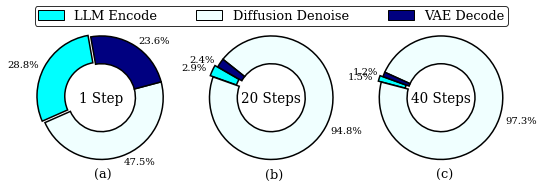

In [6]:
fig, axs = plt.subplots(1,3,figsize=(7, 2.5), gridspec_kw={'hspace': 0.05, 'wspace': 0.1, 'bottom': 0.01, 
                    'top': 0.9, 'right':0.99, 'left':0.01})#, subplot_kw=dict(aspect="equal"))

wedgeprops={"edgecolor":"black",'linewidth': 1.5, 'linestyle': '-', 'antialiased': True,"width":0.45}
LABELS = ["LLM Encode", "Diffusion Denoise", "VAE Decode"]
active_index = [0,1,2]
starting_angles = [100, 150, 160]
textprops = {'fontsize': 10}  # Increase fontsize as needed
explode = [0.05, 0, 0]
for i, dataset in enumerate(datasets):
        # explode = [0.05,0,0.00] if i != 0 else [0,0,0]

        pct = plot_data[dataset]
        labels = [f'{round(k,1)}%' for k in pct]
        get_color = itemgetter(*active_index)(colors)
        get_labels = itemgetter(*active_index)(labels)
        start_angle=starting_angles[i]
        axs[i].pie(pct, colors=get_color, wedgeprops=wedgeprops, startangle=start_angle,
                explode=explode, labels=get_labels, textprops=textprops, labeldistance=1.1,)
        axs[i].text(0., 0., INTERNAL_TEXT[i], horizontalalignment='center', verticalalignment='center', fontsize=13.5)
fig.legend(labels=LABELS, fontsize=13, edgecolor='black', 
           handles=[plt.bar((0,0),0,0, color=color, edgecolor="black") for color in colors], 
           loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=len(LABELS),
           borderpad=0.25,
           borderaxespad=0.1, handletextpad=0.8, labelspacing=1,
           handlelength=2, columnspacing=3)

fig.text(0.165, 0.01, "(a)", ha='center', fontsize=13)
fig.text(0.505, 0.01, "(b)", ha='center', fontsize=13)
fig.text(0.845, 0.01, "(c)", ha='center', fontsize=13)

plt.savefig(f"figures/fig2_phases.pdf", bbox_inches='tight')
